In [121]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [122]:
df = pd.read_csv(r'E:\netData\APS\2010\Paper\aps-RDI-2010.csv.zip')

In [123]:
df['Field'] = df['Field'].apply(lambda x:int(x//10))

def ref_classify(x):
    if x <= 10:
        return  '1-10'
    elif x <= 20:
        return  '11-20'
    elif x <= 30:
        return  '21-30'
    else:
        return  '>30'
df['binref'] = df['outdegree'].apply(ref_classify)

def ref_classify2(x):
    if x >= 1980 and x<1990:
        return  '1980-1989'
    elif x >= 1990 and x<2000:
        return  '1990-1999'
    elif x >= 2000 and x<2010:
        return  '2000-2009'
    else:
        return  '<1980'
df['binyear'] = df['year'].apply(ref_classify2)

In [119]:
df.columns

Index(['id', 'year', 'degree', 'indegree', 'outdegree', 'team size',
       '#institution', 'closeness', 'betweenness', 'authority', 'hub',
       'eigenvector', 'h', 'coreness', 'pagerank', 'cit5', 'first_cit_y',
       'TCRef', 'constraint', 'eccentricity', 'harmonic_centrality',
       'personalized_pagerank', 'B', 'da', '2stepD', 'D', 'CD2', 'ni2', 'nj2',
       'nk2', 'CD5', 'ni5', 'nj5', 'nk5', 'CD', 'ni', 'nj', 'nk', 'if Prize',
       'Field', 'rnk', 'RDraw', 'binref', 'RD', 'binyear'],
      dtype='object')

# Statistic Tables

In [125]:
columns = ['outdegree','indegree','ni','nj','nk','rnk','CD','D','RD']

dff = df[columns].describe().T
dff['skewness'] = df[columns].skew()
dff['kurt'] = df[columns].kurt()
dff.to_excel(r'G:\A J YANG PAPER\Working paper\Scientometrics Rescaled Disruption Index\fig\11.xlsx')

In [128]:
topv = np.percentile(df['indegree'],99)
df1 = df[df['indegree']>topv]
df2 = df[df['indegree']<=topv]

dff = df1[columns].describe().T
dff['skewness'] = df1[columns].skew()
dff['kurt'] = df1[columns].kurt()
dff.to_excel(r'G:\A J YANG PAPER\Working paper\Scientometrics Rescaled Disruption Index\fig\12.xlsx')

dff = df2[columns].describe().T
dff['skewness'] = df2[columns].skew()
dff['kurt'] = df2[columns].kurt()
dff.to_excel(r'G:\A J YANG PAPER\Working paper\Scientometrics Rescaled Disruption Index\fig\13.xlsx')

In [4]:
df.columns

Index(['id', 'year', 'degree', 'indegree', 'outdegree', 'team size',
       '#institution', 'closeness', 'betweenness', 'authority', 'hub',
       'eigenvector', 'h', 'coreness', 'pagerank', 'cit5', 'first_cit_y',
       'TCRef', 'constraint', 'eccentricity', 'harmonic_centrality',
       'personalized_pagerank', 'B', 'da', '2stepD', 'D', 'CD2', 'ni2', 'nj2',
       'nk2', 'CD5', 'ni5', 'nj5', 'nk5', 'CD', 'ni', 'nj', 'nk', 'if Prize',
       'Field', 'rnk', 'RDraw', 'binref', 'RD', 'binyear'],
      dtype='object')

# figures

In [72]:
parameters = ['DC','CC','RC',r'$\widehat{RC}$']

In [48]:
ds = [df[p].mean() for p in parameters]
stds = [df[p].std() for p in parameters]

In [49]:
topv = np.percentile(df['indegree'],99)
ds1 = [df[df['indegree']>topv][p].mean() for p in parameters]
stds1 = [df[df['indegree']>topv][p].std() for p in parameters]
ds2 = [df[df['indegree']<=topv][p].mean() for p in parameters]
stds2 = [df[df['indegree']<=topv][p].std() for p in parameters]

In [89]:
c = ['#1A5276','#BA4A00','#138D75','#138D75']*3
x  = [1,2,3,4,6,7,8,9,11,12,13,14]

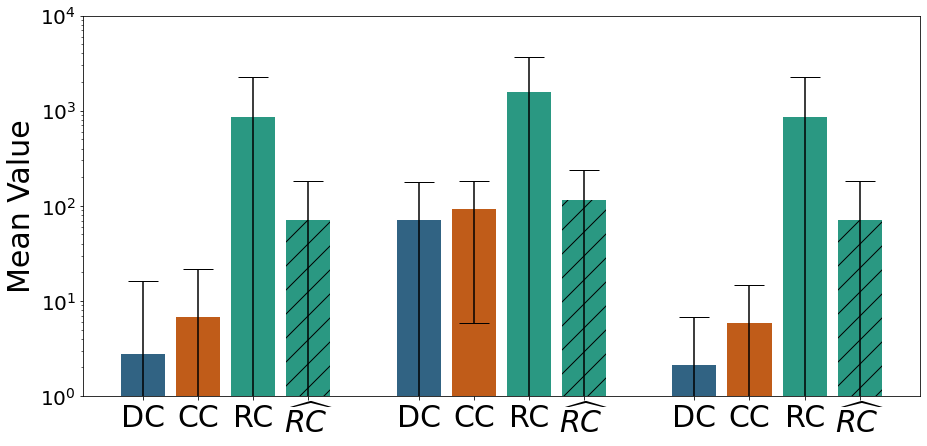

In [98]:
f, ax = plt.subplots(figsize=(15, 7))
# x = [1,2,3,4]
plt.bar(x , ds+ds1+ds2 , yerr = stds+stds1+stds2 ,color = c,capsize = 15,hatch = ['','','','/']*3 , alpha = .9)

ax.set_yscale("log")
plt.ylim(1,10e3)
plt.yticks([10e-1,10e0,10e1,10e2,10e3,],fontsize=20)
plt.xticks(x,parameters*3,fontsize=30,)
plt.ylabel('Mean Value',fontsize = 30)
plt.show()

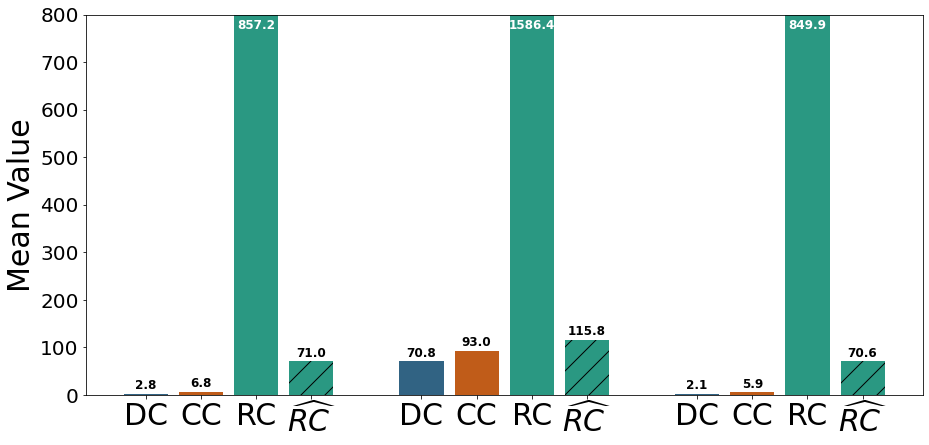

In [97]:
f, ax = plt.subplots(figsize=(15, 7))
d = ds+ds1+ds2
plt.bar(x , d ,color = c,capsize = 15,hatch = ['','','','/']*3 , alpha = .9)
for _ in range(len(d)):
    if d[_]>200:
        plt.text(x[_], 800-30 , str(d[_].round(1)),fontsize = 12,c = 'white', ha='center', fontweight='bold')
    else:
        plt.text(x[_], d[_]+10 , str(d[_].round(1)),fontsize = 12,c = 'black', ha='center', fontweight='bold')
plt.ylim(0,800)
plt.yticks(fontsize=20)
plt.xticks(x,parameters*3,fontsize=30,)
plt.ylabel('Mean Value',fontsize = 30)
plt.show()

In [99]:
formula = 'ni ~ outdegree'
# fit the OLS model
model = sm.formula.ols(formula=formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     ni   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     250.0
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           2.70e-56
Time:                        18:13:06   Log-Likelihood:            -1.2713e+06
No. Observations:              315982   AIC:                         2.543e+06
Df Residuals:                  315980   BIC:                         2.543e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2499      0.038     84.882      0.0

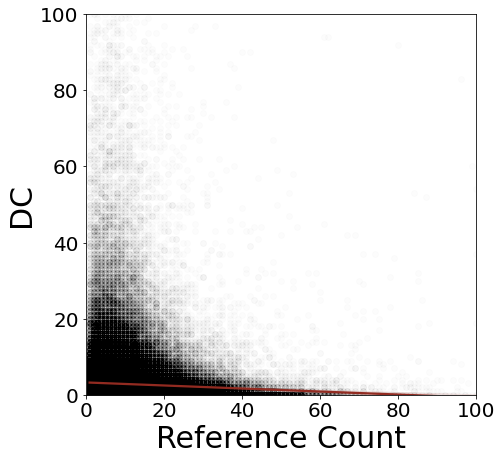

In [78]:
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df['outdegree'], df['ni'], c = 'black' , alpha = 0.01)
sns.regplot(data = df , y='ni' , x='outdegree', x_ci = 90 , n_boot = 100 ,seed = 0 , color = '#922B21',scatter = False)
plt.ylim(0,100)
plt.xlim(0,100)
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.xlabel('Reference Count',fontsize = 30)
plt.ylabel('DC',fontsize = 30)
plt.show()

In [100]:
formula = 'nj ~ outdegree'
# fit the OLS model
model = sm.formula.ols(formula=formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     nj   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     9686.
Date:                Fri, 28 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:14:11   Log-Likelihood:            -1.2996e+06
No. Observations:              315982   AIC:                         2.599e+06
Df Residuals:                  315980   BIC:                         2.599e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5640      0.042     85.104      0.0

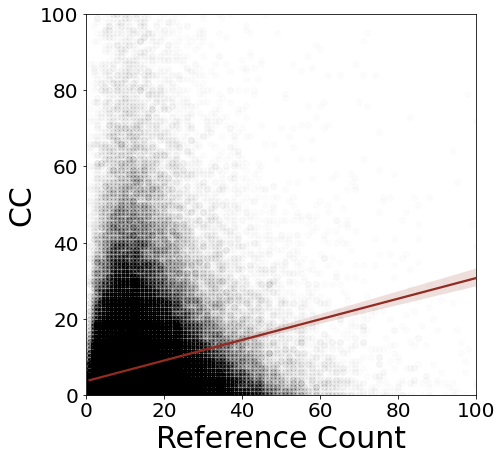

In [79]:
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df['outdegree'], df['nj'], c = 'black' , alpha = 0.01)
sns.regplot(data = df , y='nj' , x='outdegree', x_ci = 90 , n_boot = 100 ,seed = 0 , color = '#922B21',scatter = False)
plt.ylim(0,100)
plt.xlim(0,100)
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.xlabel('Reference Count',fontsize = 30)
plt.ylabel('CC',fontsize = 30)
plt.show()

In [101]:
formula = 'nk ~ outdegree'
# fit the OLS model
model = sm.formula.ols(formula=formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     nk   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                 6.878e+04
Date:                Fri, 28 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:14:40   Log-Likelihood:            -2.7090e+06
No. Observations:              315982   AIC:                         5.418e+06
Df Residuals:                  315980   BIC:                         5.418e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    117.8373      3.624     32.519      0.0

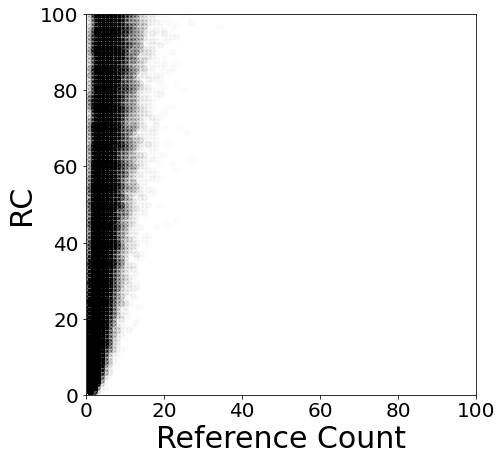

In [84]:
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df['outdegree'], df['nk'], c = 'black' , alpha = 0.01)
sns.regplot(data = df , y='nk' , x='outdegree', x_ci = 90 , n_boot = 100 ,seed = 0 , color = '#922B21',scatter = False)
plt.ylim(0,100)
plt.xlim(0,100)
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.xlabel('Reference Count',fontsize = 30)
plt.ylabel('RC',fontsize = 30)
plt.show()

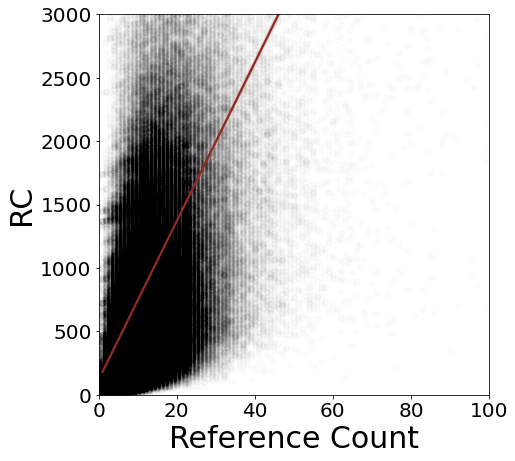

In [85]:
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df['outdegree'], df['nk'], c = 'black' , alpha = 0.01)
sns.regplot(data = df , y='nk' , x='outdegree', x_ci = 90 , n_boot = 100 ,seed = 0 , color = '#922B21',scatter = False)
plt.ylim(0,3000)
plt.xlim(0,100)
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.xlabel('Reference Count',fontsize = 30)
plt.ylabel('RC',fontsize = 30)
plt.show()

In [102]:
formula = 'rnk ~ outdegree'
# fit the OLS model
model = sm.formula.ols(formula=formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    rnk   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     84.94
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           3.10e-20
Time:                        18:15:36   Log-Likelihood:            -1.9413e+06
No. Observations:              315982   AIC:                         3.883e+06
Df Residuals:                  315980   BIC:                         3.883e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.7423      0.319    215.433      0.0

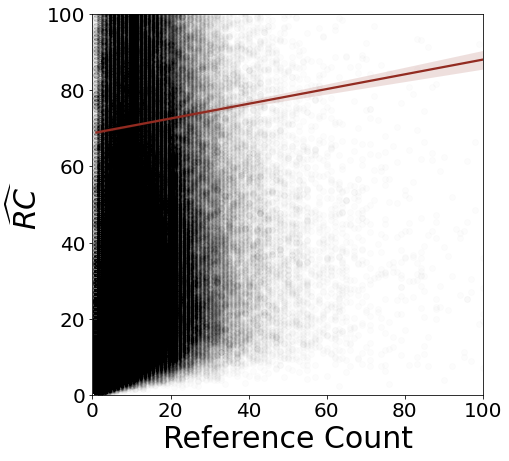

In [86]:
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df['outdegree'], df['rnk'], c = 'black' , alpha = 0.01)
sns.regplot(data = df , y='rnk' , x='outdegree', x_ci = 90 , n_boot = 100 ,seed = 0 , color = '#922B21',scatter = False)
plt.ylim(0,100)
plt.xlim(0,100)
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.xlabel('Reference Count',fontsize = 30)
plt.ylabel(r'$\widehat{RC}$',fontsize = 30)
plt.show()

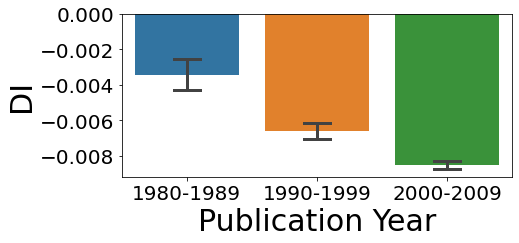

In [118]:
dff = df[df['binyear']!='<1980']
f, ax = plt.subplots(figsize=(7, 3))
sns.barplot(data=dff, x="binyear", y='CD' , errwidth=3, capsize=.2)
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.xlabel('Publication Year',fontsize = 30)
plt.ylabel(r'DI',fontsize = 30)
plt.show()

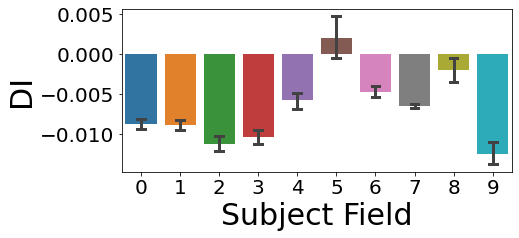

In [117]:
f, ax = plt.subplots(figsize=(7, 3))
sns.barplot(data=df, x="Field", y='CD' , errwidth=3, capsize=.2)
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.xlabel('Subject Field',fontsize = 30)
plt.ylabel(r'DI',fontsize = 30)
plt.show()